In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

def cv_show(name, img):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def plt_show(image, name=''):
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # 获取图像的原始尺寸
    height, width, _ = img_rgb.shape
    # 设置图像的显示尺寸（以像素为单位）
    dpi = 100  # 图像的分辨率（点每英寸）
    figsize = width / float(dpi), height / float(dpi)
    # 创建一个具有指定尺寸的图形
    plt.figure(figsize=figsize)
    plt.imshow(img_rgb)
    title = name
    plt.title(title)
    # 清除坐标轴刻度
    plt.xticks([]) 
    plt.yticks([]) 
    plt.xlabel(f'figsize:{figsize}inch', fontsize=12, labelpad=15)
    plt.show()

### 模板匹配


OpenCV 中的模板匹配（Template Matching）是一种在图像中查找与预定义模板（或子图像）匹配的区域的常用技术。模板匹配通常用于图像识别、对象检测和图像分割等任务。

模板匹配过程与卷积操作中滑窗的过程很像， 模板在原图像上从原点开始滑动， 计算模板与（图像被模板覆盖的地方）的差异程度， 这个差异程度的计算方法在opencv中有6种， 然后将每次计算结果放入一个矩阵里，作为结果输出。</br>假如原图形尺寸为A×B，而模板尺寸是a×b，则输出结果的矩阵尺寸为：(A-a+1)×(B-b+1)

##### result = cv2.matchTemplate(image, template, method)

cv2.matchTemplate 函数是 OpenCV 库中的一个函数，用于在图像中找到与给定模板匹配的最佳位置。</br>这个函数在图像处理和计算机视觉中非常有用，因为它可以帮助我们定位和分析图像中的特定对象或形状。

参数：</br>
- image：输入图像，通常是彩色图像。
- template：输入模板，它是一个小的图像区域，通常是灰度图像。
- method：匹配方法，可以是以下几种之一：
- - cv2.TM_SQDIFF：最小化错误平方差。（计算出的值越小，则越相关）
- - cv2.TM_SQDIFF_NORMED：最小化错误平方差，归一化。（计算出的值越接近0，则越相关）
- - cv2.TM_CCORR：相关性。（计算出的值越大，则越相关）
- - cv2.TM_CCORR_NORMED：相关性，归一化。（计算出的值越接近1，则越相关）
- - cv2.TM_CCOEFF：相关系数。（计算出的值越大，则越相关）
- - cv2.TM_CCOEFF_NORMED：系数，归一化。（计算出的值越接近1，则越相关）

返回值：</br>
-  result 是一个矩阵，矩阵中的每个元素代表模板图像与图像相应区域之间的相似度。最大值通常表示最佳匹配位置。

##### min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(array)

cv2.minMaxLoc 函数是 OpenCV 库中的一个函数，用于在给定的数组中找到最小值和最大值以及它们的位置。</br>这个函数在图像处理和计算机视觉中非常有用，因为它可以帮助我们定位图像中的特定区域或标记。

参数：</br>
- array：输入数组，可以是灰度图像、彩色图像或任何类型的数组

返回值：</br>
- min_val、max_val、min_loc 和 max_loc 分别是数组中的最小值、最大值以及它们的位置。位置是一个元组 (x, y)，表示最小值或最大值所在的坐标

##### 示例

In [2]:
# 原图
img = cv2.imread('assets/lena.jpg', cv2.IMREAD_GRAYSCALE)
# 模板
template = cv2.imread('assets/lena_face.png', cv2.IMREAD_GRAYSCALE)
# 获取模板的高和宽
h, w = template.shape

In [3]:
img.shape

(263, 263)

In [4]:
template.shape

(161, 157)

In [5]:
res = cv2.matchTemplate(img, template, cv2.TM_SQDIFF_NORMED)
res.shape

(103, 107)

In [6]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

In [7]:
min_val

0.22203682363033295

In [8]:
max_val

0.4376338720321655

In [9]:
min_loc

(51, 43)

In [10]:
max_loc

(0, 102)

0


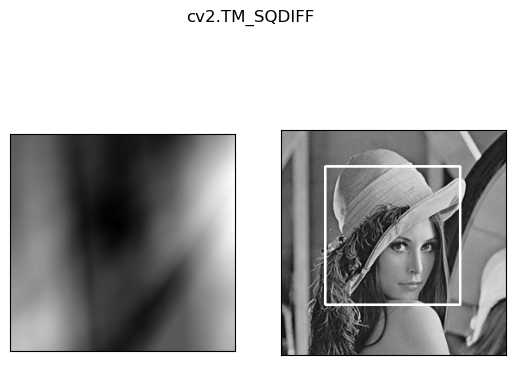

1


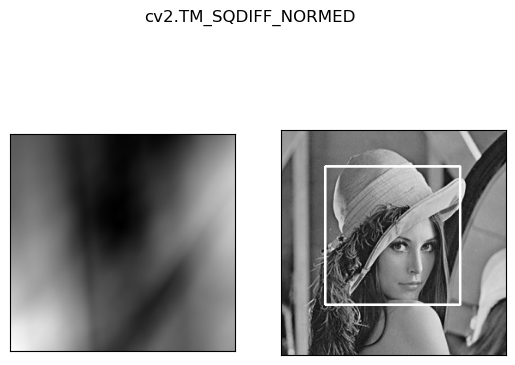

2


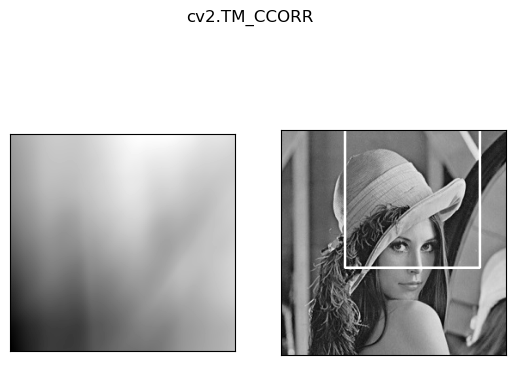

3


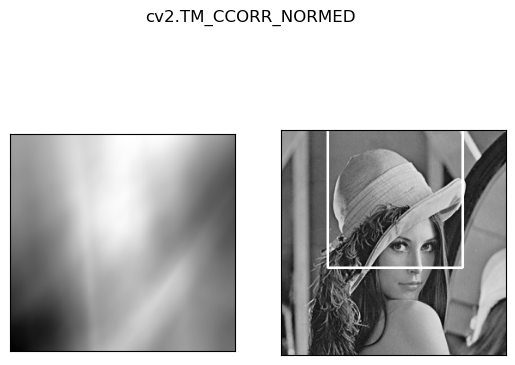

4


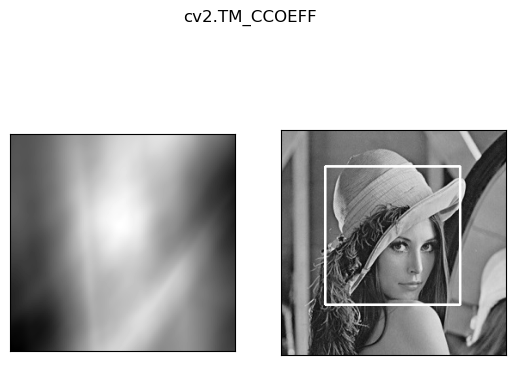

5


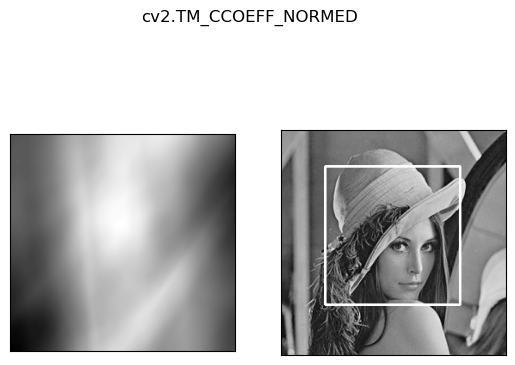

In [11]:
methods = ['cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED', 
            'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED']
for meth in methods:
    img2 = img.copy()

    # 获取匹配方法的真值
    method = eval(meth)
    print(method)
    res = cv2.matchTemplate(img, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # 如果是平方差匹配cv2.TM_SQDIFF或归一化平方差匹配cv2.TM_SQDIFF_NORMED，取最小值
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        left_top = min_loc  # 匹配区域的左上角坐标
    else:
        left_top = max_loc
    right_bottom = (left_top[0]+w, left_top[1]+h)

    # 画矩形
    cv2.rectangle(img2, left_top, right_bottom, 255, 2)

    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.xticks([]), plt.yticks([])  # 隐藏坐标轴
    plt.subplot(122), plt.imshow(img2, cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

匹配多个模板

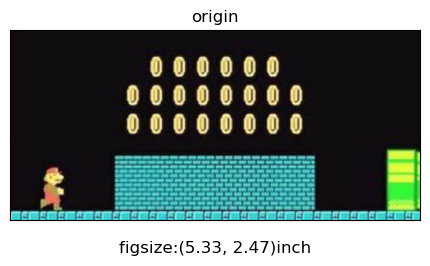

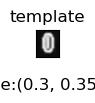

(247, 533) (35, 30)


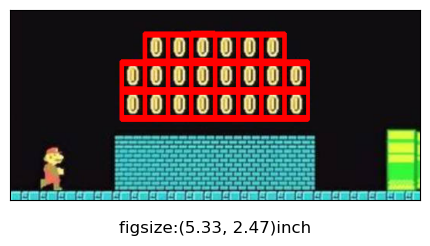

In [14]:
img_bgr = cv2.imread('assets/mario.jpg')
plt_show(img_bgr, 'origin')
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
template = cv2.imread('assets/mario_coin.jpg', cv2.IMREAD_GRAYSCALE)
plt_show(template, 'template')
h, w = template.shape[:2]
print(img_gray.shape, template.shape)

res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
threshold = 0.8
# np.where返回一个元组，包含所有相似度得分（相关系数）大于等于阈值的点的坐标（索引）。
#   因为res是个二维array数组
#   所以返回的loc是个包含两个array数组的元组，元组中的第一个array数组表示元素的行位置，第二个array数组表示元素的列位置
loc = np.where(res >= threshold)

# 切片:[起始: 结束: 步长（间距）]，当步长为-1时，翻转元素顺序（倒序）
# 因为loc返回的是(y, x)格式的坐标，而我们需要(x, y)格式。
reverse = loc[::-1]

# 对于每一个匹配的位置，绘制一个红色矩形框。
# zip()函数的作用是将两个元素组合在一起
# *号操作符搭配zip()函数使用， 用来“解包”（将元素取出）
for pt in zip(*reverse): 
    right_bottom = (pt[0] + w, pt[1] + h)
    cv2.rectangle(img_bgr, pt, right_bottom, (0, 0, 255), 2)

cv_show('', img_bgr)
plt_show(img_bgr)